**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [3]:
import numpy as np
import pandas as pd

# Define parameters
A = 1  # Technology parameter
gamma = 0.5  # Production elasticity
alpha = 0.5  # Consumer preference parameter
nu = 1  # Utility parameter
epsilon = 0.5  # Labor disutility parameter
w = 1  # Wage (numeraire)

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

# Checking market clearing conditions
results = []
for p1 in p1_range:
    for p2 in p2_range:
        labor1 = optimal_labor(p1, A, w, gamma)
        labor2 = optimal_labor(p2, A, w, gamma)
        output1 = optimal_output(labor1, A, gamma)
        output2 = optimal_output(labor2, A, gamma)
        pi1 = implied_profits(p1, A, w, gamma)
        pi2 = implied_profits(p2, A, w, gamma)
        
        total_labor = labor1 + labor2
        c1, c2 = optimal_consumption(w, total_labor, alpha, p1, p2, pi1, pi2, tau=0)
        
        # Market clearing conditions
        labor_clearing = np.isclose(total_labor, labor1 + labor2)
        good1_clearing = np.isclose(c1, output1)
        good2_clearing = np.isclose(c2, output2)
        
        results.append({
            'p1': p1,
            'p2': p2,
            'Labor Clearing': labor_clearing,
            'Good1 Clearing': good1_clearing,
            'Good2 Clearing': good2_clearing
        })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df



,p1,p2,Labor Clearing,Good1 Clearing,Good2 Clearing
0,0.1,0.100000,True,True,True
1,0.1,0.311111,True,False,False
2,0.1,0.522222,True,False,False
3,0.1,0.733333,True,False,False
4,0.1,0.944444,True,False,False
...,...,...,...,...,...
95,2.0,1.155556,True,False,False
96,2.0,1.366667,True,False,False
97,2.0,1.577778,True,False,False
98,2.0,1.788889,True,False,False


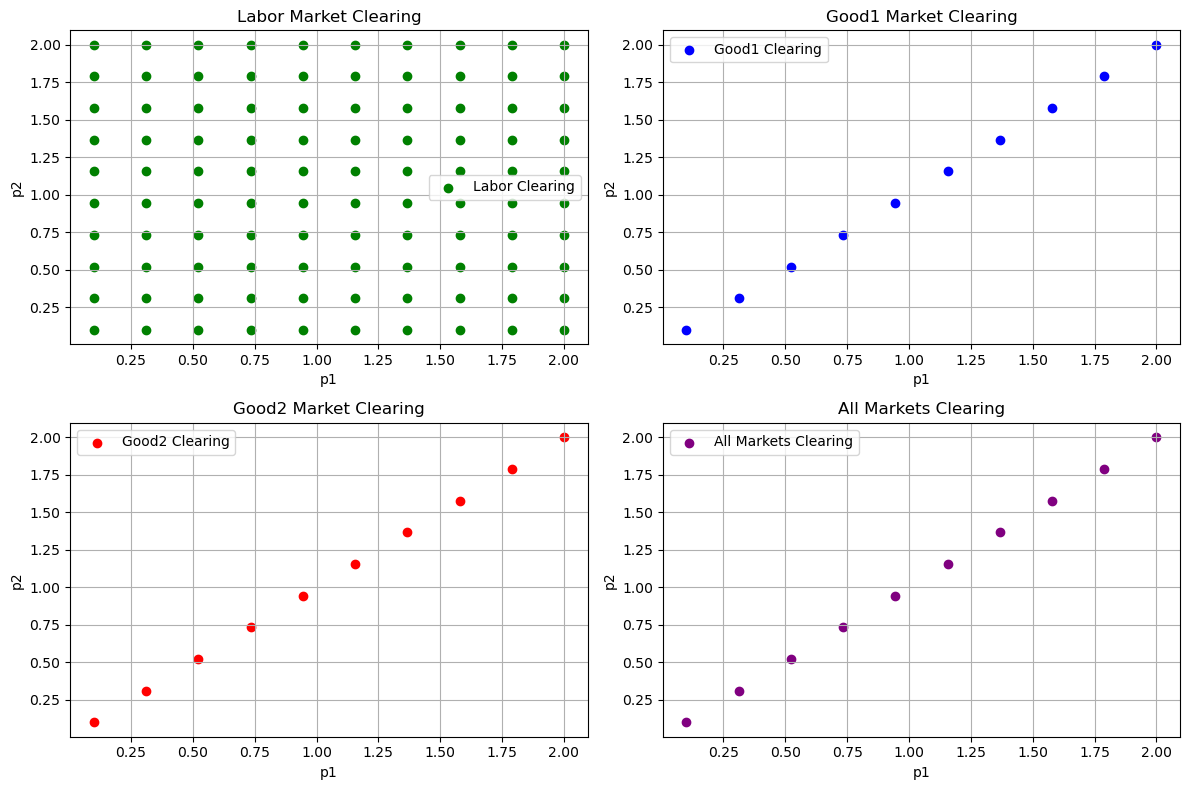

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the results based on market clearing conditions
labor_clear = results_df[results_df['Labor Clearing']]
good1_clear = results_df[results_df['Good1 Clearing']]
good2_clear = results_df[results_df['Good2 Clearing']]
all_clear = results_df[(results_df['Labor Clearing']) & (results_df['Good1 Clearing']) & (results_df['Good2 Clearing'])]

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Labor Clearing
plt.subplot(2, 2, 1)
plt.scatter(labor_clear['p1'], labor_clear['p2'], c='green', label='Labor Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Labor Market Clearing')
plt.legend()
plt.grid(True)

# Plot for Good1 Clearing
plt.subplot(2, 2, 2)
plt.scatter(good1_clear['p1'], good1_clear['p2'], c='blue', label='Good1 Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good1 Market Clearing')
plt.legend()
plt.grid(True)

# Plot for Good2 Clearing
plt.subplot(2, 2, 3)
plt.scatter(good2_clear['p1'], good2_clear['p2'], c='red', label='Good2 Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good2 Market Clearing')
plt.legend()
plt.grid(True)

# Plot for All Clearing Conditions
plt.subplot(2, 2, 4)
plt.scatter(all_clear['p1'], all_clear['p2'], c='purple', label='All Markets Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('All Markets Clearing')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Labor market clearing: 

Good 1 and 2 market clearing (Walras law):

All market clering

In [11]:
par = SimpleNamespace()

v

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

          p1        p2
58  1.155556  1.788889


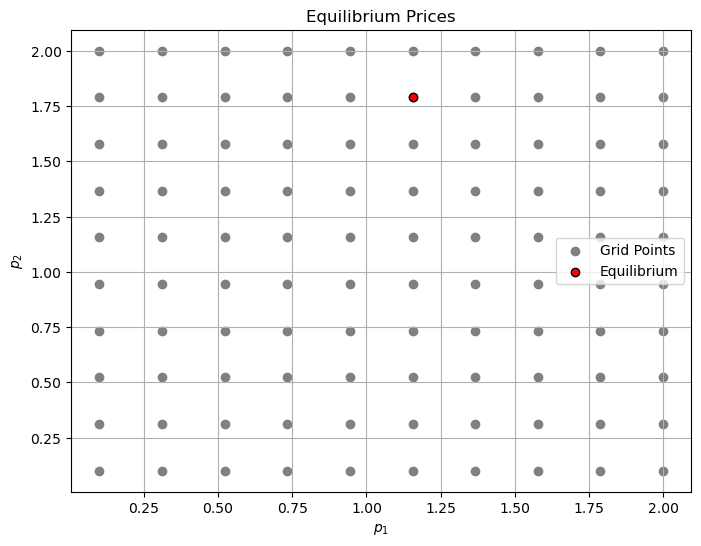

In [31]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0
w = 1.0  # Wage is numeraire

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

# Equilibrium conditions
def equilibrium_conditions(prices):
    p1, p2 = prices
    
    # Firm 1
    labor1 = optimal_labor(p1, par.A, w, par.gamma)
    output1 = optimal_output(labor1, par.A, par.gamma)
    pi1 = implied_profits(p1, par.A, w, par.gamma)
    
    # Firm 2
    labor2 = optimal_labor(p2, par.A, w, par.gamma)
    output2 = optimal_output(labor2, par.A, par.gamma)
    pi2 = implied_profits(p2, par.A, w, par.gamma)
    
    # Total labor
    total_labor = labor1 + labor2
    
    # Consumer optimal consumption
    c1, c2 = optimal_consumption(w, total_labor, par.alpha, p1, p2, pi1, pi2, par.tau)
    
    # Market clearing conditions
    good1_clearing = c1 - output1
    good2_clearing = c2 - output2
    
    return [good1_clearing, good2_clearing]

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Grid search for equilibrium prices
results = []
for p1 in p1_range:
    for p2 in p2_range:
        conditions = equilibrium_conditions([p1, p2])
        results.append({
            'p1': p1,
            'p2': p2,
            'Good1 Clearing': np.abs(conditions[0]),
            'Good2 Clearing': np.abs(conditions[1])
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the minimum values for good market clearing conditions
min_good1_clear = results_df['Good1 Clearing'].min()
min_good2_clear = results_df['Good2 Clearing'].min()

equilibrium_df = results_df[(results_df['Good1 Clearing'] == min_good1_clear) & (results_df['Good2 Clearing'] == min_good2_clear)]

# Display equilibrium prices
equilibrium_prices = equilibrium_df[['p1', 'p2']]
print(equilibrium_prices)

# Plot equilibrium prices with p1 on x-axis and p2 on y-axis
plt.figure(figsize=(8, 6))
plt.scatter(results_df['p1'], results_df['p2'], c='gray', label='Grid Points')
plt.scatter(equilibrium_df['p1'], equilibrium_df['p2'], color='red', edgecolor='black', label='Equilibrium')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('Equilibrium Prices')
plt.legend()
plt.grid(True)
plt.show()



Intuition: p_2 higher than p_1 due to consumer preferences. She values good 2 more, which is reflected in the price of good 2.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

          tau         T       SWF
140  0.368421  0.000000 -0.791354
141  0.368421  0.052632 -0.791354
142  0.368421  0.105263 -0.791354
143  0.368421  0.157895 -0.791354
144  0.368421  0.210526 -0.791354
145  0.368421  0.263158 -0.791354
146  0.368421  0.315789 -0.791354
147  0.368421  0.368421 -0.791354
148  0.368421  0.421053 -0.791354
149  0.368421  0.473684 -0.791354
150  0.368421  0.526316 -0.791354
151  0.368421  0.578947 -0.791354
152  0.368421  0.631579 -0.791354
153  0.368421  0.684211 -0.791354
154  0.368421  0.736842 -0.791354
155  0.368421  0.789474 -0.791354
156  0.368421  0.842105 -0.791354
157  0.368421  0.894737 -0.791354
158  0.368421  0.947368 -0.791354
159  0.368421  1.000000 -0.791354


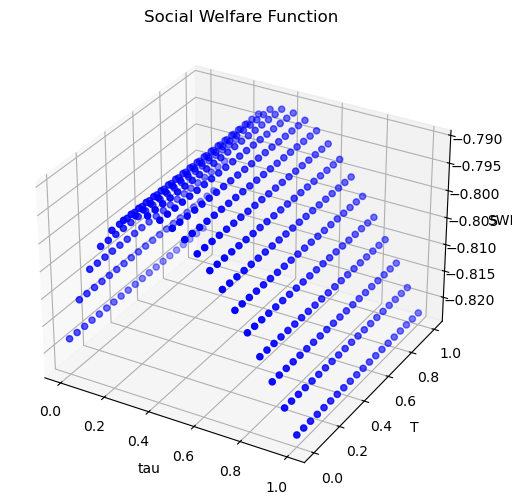

In [7]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1
w = 1.0  # Wage is numeraire

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

def utility(w, labor, alpha, p1, p2, pi1, pi2, tau, T, nu, epsilon):
    c1, c2 = optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau)
    U = np.log(c1**alpha * c2**(1 - alpha)) - nu * (labor**(1 + epsilon)) / (1 + epsilon)
    return U

# Equilibrium prices found in Question 2
p1_star = 1.155556
p2_star = 1.788889

# Grid search for optimal tau and T
tau_range = np.linspace(0.0, 1.0, 20)
T_range = np.linspace(0.0, 1.0, 20)

results = []
for tau in tau_range:
    for T in T_range:
        # Firm 1
        labor1 = optimal_labor(p1_star, par.A, w, par.gamma)
        output1 = optimal_output(labor1, par.A, par.gamma)
        pi1 = implied_profits(p1_star, par.A, w, par.gamma)
        
        # Firm 2
        labor2 = optimal_labor(p2_star, par.A, w, par.gamma)
        output2 = optimal_output(labor2, par.A, par.gamma)
        pi2 = implied_profits(p2_star, par.A, w, par.gamma)
        
        # Total labor
        total_labor = labor1 + labor2
        
        # Consumer optimal utility
        U = utility(w, total_labor, par.alpha, p1_star, p2_star, pi1, pi2, tau, T, par.nu, par.epsilon)
        
        # Social welfare function
        SWF = U - par.kappa * output2
        
        results.append({
            'tau': tau,
            'T': T,
            'SWF': SWF
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the maximum SWF
max_swf = results_df['SWF'].max()
optimal_params = results_df[results_df['SWF'] == max_swf]

# Display the optimal parameters
print(optimal_params)

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df['tau'], results_df['T'], results_df['SWF'], c='blue', marker='o')
ax.set_xlabel('tau')
ax.set_ylabel('T')
ax.set_zlabel('SWF')
plt.title('Social Welfare Function')
plt.show()


To find the value of T that optimizes SWF, we utilize the gov budget constraint $T=\tau\cdot c_2^*$ as we have the values for $\tau=0.368421$ and all parameter values for $c_2^*$ needed to solve for $T$.

Algebraically, we derive $T$:

Starting from the government budget constraint:
$ T = \tau \cdot c_2^* $

We know that:
$ c_2^* = (1 - \alpha) \frac{w \ell + T + \pi_1 + \pi_2}{p_2 + \tau} $

Substitute $ c_2^* $ into the equation:
$ T = \frac{\tau (1 - \alpha) (w \ell + T + \pi_1 + \pi_2)}{p_2 + \tau} $


Factor out $ T $ from the numerator:
$ T (p_2 + \tau) = \tau (1 - \alpha) (w \ell + \pi_1 + \pi_2) + \tau (1 - \alpha) T $

Isolating $T$ we get:
$ T (p_2 + \tau - \tau (1 - \alpha)) = \tau (1 - \alpha) (w \ell + \pi_1 + \pi_2) $

$ T \left(p_2 + \tau (1 - (1 - \alpha))\right) = \tau (1 - \alpha) (w \ell + \pi_1 + \pi_2) $

Simplify the expression:
$ T \left(p_2 + \tau \alpha\right) = \tau (1 - \alpha) (w \ell + \pi_1 + \pi_2) $

Solve for $ T $:
$ T = \frac{\tau (1 - \alpha) (w \ell + \pi_1 + \pi_2)}{p_2 + \tau \alpha} $

Using the equilibrium labor and profits:
$ w \ell = (p_2 \cdot A \cdot \gamma)^{\frac{\gamma}{1-\gamma}} + (p_1 \cdot A \cdot \gamma)^{\frac{\gamma}{1-\gamma}} $

$ \pi_1 = \frac{1 - \gamma}{\gamma} \cdot w \ell_1 $

$ \pi_2 = \frac{1 - \gamma}{\gamma} \cdot w \ell_2 $

Substitute these back into the equation and we have isolated $T$:

$ T = \frac{\tau (1 - \alpha) \left((p_2 \cdot A \cdot \gamma)^{\frac{\gamma}{1-\gamma}} + \frac{1 - \gamma}{\gamma} \cdot (p_1 \cdot A \cdot \gamma)^{\frac{\gamma}{1-\gamma}} + \frac{1 - \gamma}{\gamma} \cdot (p_2 \cdot A \cdot \gamma)^{\frac{\gamma}{1-\gamma}}\right)}{p_2 + \tau \alpha} $

Now, we can insert the values of the parameters to find the value of $T$:


In [5]:
# The parameter values are given in the exam set:
p1 = 1.155556
p2 = 1.788889
tau = 0.368
A = 1.0
gamma = 0.5
alpha = 0.3

# Defining the optimal profit and labor functions gets us:
term1 = (p2 * A * gamma) ** (gamma / (1 - gamma))
term2 = (p1 * A * gamma) ** (gamma / (1 - gamma))
term3 = (p2 * A * gamma) ** (gamma / (1 - gamma))

# Next, we compute the numerator and denominator, respectively, such that we can compute the imlied lump-sum tax, T
numerator = tau * (1 - alpha) * (term1 + (1 - gamma) / gamma * term2 + (1 - gamma) / gamma * term3)
denominator = p2 + tau * alpha
T = numerator / denominator

T


0.32099033859512693

The value of $T$ calculated using the given equation and parameters is approximately 0.32. 

Using these two values, we can find the optimal SWF. 

Intuition: 

Tau: optimal tax rate on CO2 omission - internalizing externalitites ...

Implied lump-sum tax redistributed to consumers

SWF: negative. What is that supposed to mean? Disutility? We should also change optimal SWF in figure

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [63]:
import numpy as np
import pandas as pd
from types import SimpleNamespace

# Parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.F = np.arange(1, par.N + 1)
par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Simulation
np.random.seed(7)  # For reproducibility
epsilon = np.random.normal(0, par.sigma, (par.K, par.J))

# Calculate expected utilities
expected_utilities = par.v + epsilon.mean(axis=0)

# Prepare the results in a DataFrame for better visualization
results = pd.DataFrame({
    'Career Choice': np.arange(1, par.J + 1),
    'Expected Utility': expected_utilities
})

# Display the results without the index
print(results.to_string(index=False))




 Career Choice  Expected Utility
             1          0.965095
             2          2.007746
             3          2.981345


That is, the expected utilities are approximately $1.00$, $2.00$ and  $3.00$ for career track 1, 2 and 3, respectively based on the simulation with $10,000$ draws.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

Share of Graduates Choosing Each Career:
Chosen Career       1       2       3
Graduate                             
1              0.1506  0.3009  0.5485
2              0.0962  0.2746  0.6292
3              0.0677  0.2451  0.6872
4              0.0478  0.2232  0.7290
5              0.0329  0.1970  0.7701
6              0.0246  0.1883  0.7871
7              0.0169  0.1705  0.8126
8              0.0138  0.1538  0.8324
9              0.0099  0.1472  0.8429
10             0.0088  0.1376  0.8536

Average Subjective Expected Utility:
Graduate
1     3.916765
2     3.476096
3     3.336118
4     3.235321
5     3.172033
6     3.139282
7     3.105329
8     3.089818
9     3.066925
10    3.056166
Name: Prior Expected Utility, dtype: float64

Average Ex Post Realized Utility:
Graduate
1     2.455174
2     2.523703
3     2.623042
4     2.704575
5     2.754498
6     2.745181
7     2.845156
8     2.859079
9     2.820646
10    2.856297
Name: Realized Utility, dtype: float64


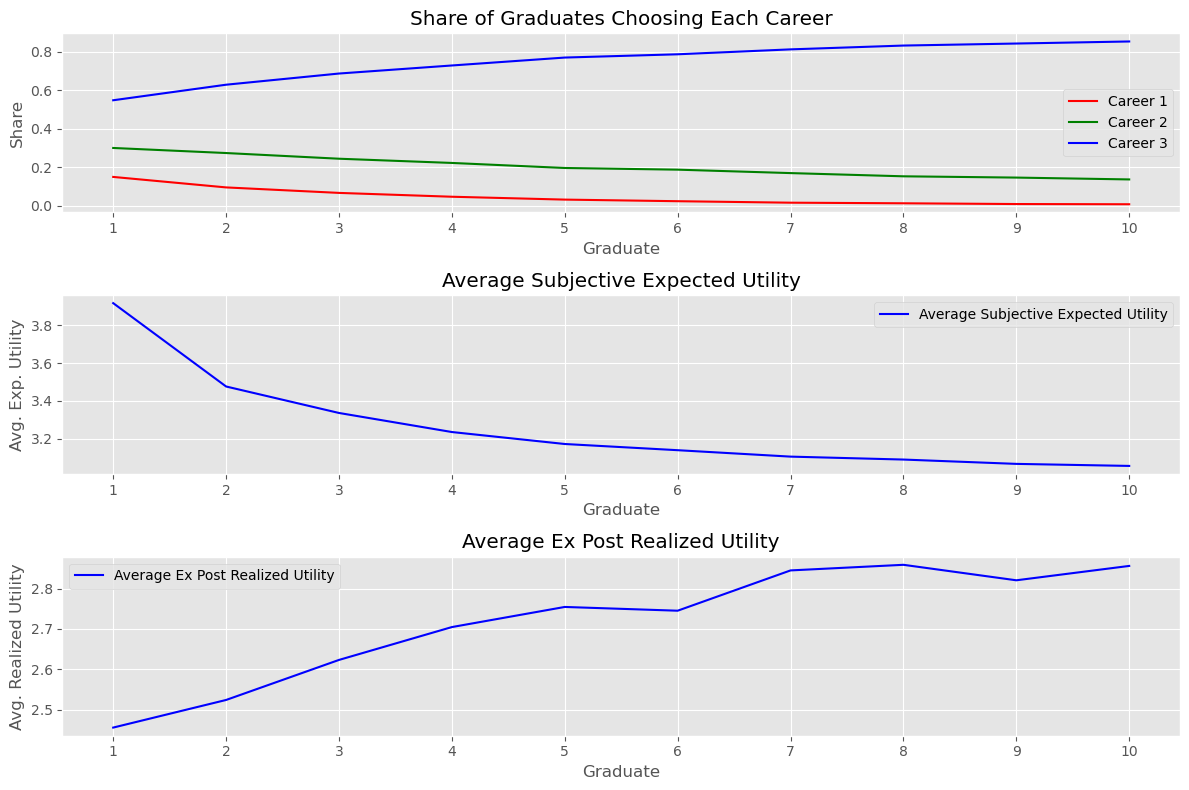

In [72]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Simulation function
def simulate_career_choices(seed=7):
    np.random.seed(seed)
    results = []
    
    for k in range(par.K):
        epsilon_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        epsilon_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        for i in range(1, par.N + 1):
            # Calculate prior expected utilities
            prior_expected_utilities = par.v + np.mean(epsilon_friends[i], axis=0)
            
            # Determine the career choice with the highest expected utility
            chosen_career = np.argmax(prior_expected_utilities) + 1
            
            # Calculate the realized utility
            realized_utility = par.v[chosen_career - 1] + epsilon_personal[i][chosen_career - 1]
            
            results.append({
                'Graduate': i,
                'Chosen Career': chosen_career,
                'Prior Expected Utility': prior_expected_utilities[chosen_career - 1],
                'Realized Utility': realized_utility
            })
    
    return pd.DataFrame(results)

# Perform the simulation
results_df = simulate_career_choices()

# Calculate the required statistics
share_graduates_choosing_career = results_df.groupby('Graduate')['Chosen Career'].value_counts(normalize=True).unstack(fill_value=0)
average_subjective_expected_utility = results_df.groupby('Graduate')['Prior Expected Utility'].mean()
average_ex_post_realized_utility = results_df.groupby('Graduate')['Realized Utility'].mean()

# Display the results
print("Share of Graduates Choosing Each Career:")
print(share_graduates_choosing_career)
print("\nAverage Subjective Expected Utility:")
print(average_subjective_expected_utility)
print("\nAverage Ex Post Realized Utility:")
print(average_ex_post_realized_utility)

# Visualize the results
plt.figure(figsize=(12, 8))

# Share of Graduates Choosing Each Career
plt.subplot(3, 1, 1)
colors = ['red', 'green', 'blue']
for idx, career in enumerate(range(1, par.J + 1)):
    plt.plot(share_graduates_choosing_career.index, share_graduates_choosing_career[career], label=f'Career {career}', color=colors[idx])
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate')
plt.ylabel('Share')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

# Average Subjective Expected Utility
plt.subplot(3, 1, 2)
plt.plot(average_subjective_expected_utility.index, average_subjective_expected_utility, label='Average Subjective Expected Utility', color='blue')
plt.title('Average Subjective Expected Utility')
plt.xlabel('Graduate')
plt.ylabel('Avg. Exp. Utility')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

# Average Ex Post Realized Utility
plt.subplot(3, 1, 3)
plt.plot(average_ex_post_realized_utility.index, average_ex_post_realized_utility, label='Average Ex Post Realized Utility', color='blue')
plt.title('Average Ex Post Realized Utility')
plt.xlabel('Graduate')
plt.ylabel('Avg. Realized Utility')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

plt.tight_layout()
plt.show()




Intuition: 

Table: 

Intuition graphs: 

Figure 1:

Figure 2:

Figure 3: 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

Share of Graduates Choosing Each Career after Switching:
New Chosen Career        1        2        3
Graduate                                    
1                  0.13970  0.29666  0.56364
2                  0.09956  0.27370  0.62674
3                  0.07816  0.25812  0.66372
4                  0.06090  0.24758  0.69152
5                  0.04966  0.23548  0.71486
6                  0.03832  0.23070  0.73098
7                  0.03398  0.22182  0.74420
8                  0.02948  0.21602  0.75450
9                  0.02432  0.21156  0.76412
10                 0.02156  0.20540  0.77304

Average Subjective Expected Utility after Switching:
Graduate
1     3.900232
2     3.483935
3     3.317149
4     3.224463
5     3.170703
6     3.135389
7     3.104804
8     3.083594
9     3.068662
10    3.057935
Name: Prior Expected Utility, dtype: float64

Average Ex Post Realized Utility after Switching:
Graduate
1     2.964901
2     3.071256
3     3.130077
4     3.171553
5     3.193268
6     3.21

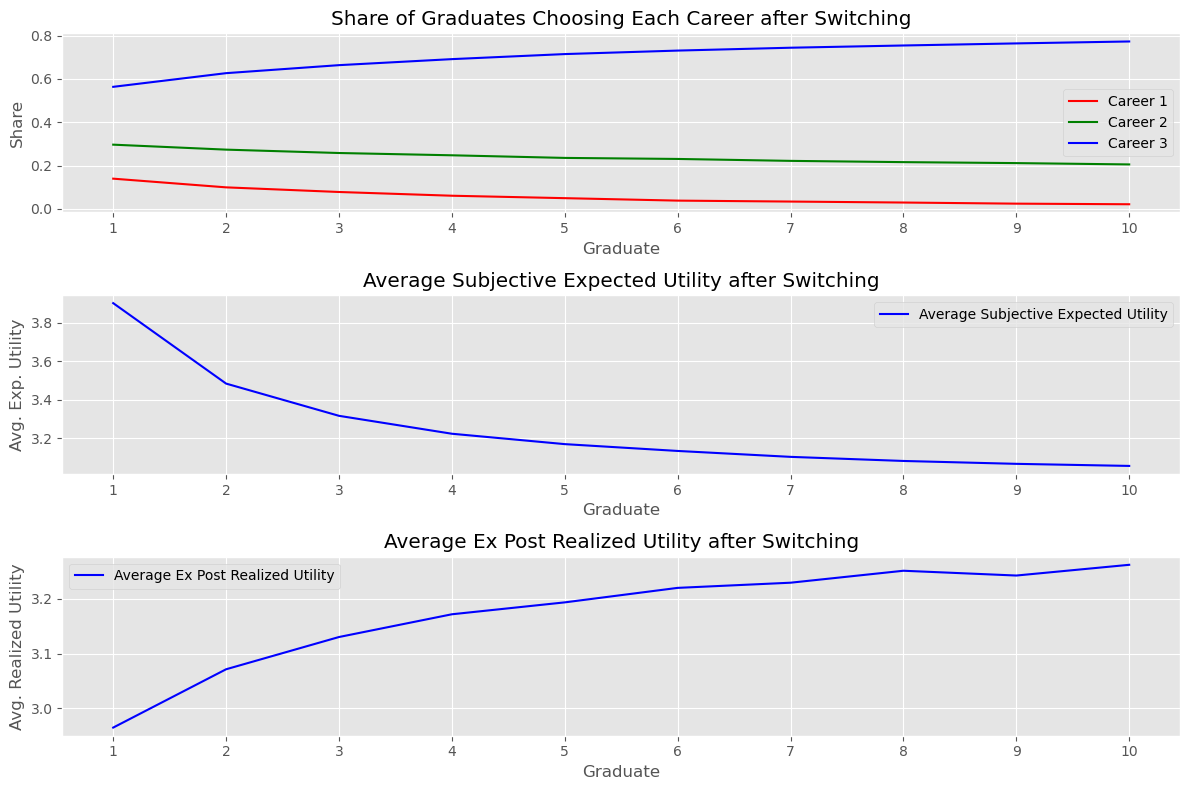

In [74]:
def simulate_career_choices_with_switching(seed=7):
    np.random.seed(seed)
    initial_results = simulate_career_choices(seed)
    results_with_switching = []

    for k in range(par.K):
        epsilon_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        epsilon_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        for i in range(1, par.N + 1):
            # Calculate prior expected utilities
            prior_expected_utilities = par.v + np.mean(epsilon_friends[i], axis=0)
            
            # Determine the career choice with the highest expected utility
            chosen_career = np.argmax(prior_expected_utilities) + 1
            
            # Calculate the realized utility
            realized_utility = par.v[chosen_career - 1] + epsilon_personal[i][chosen_career - 1]
            
            # After learning the realized utility, reconsider career choice
            new_prior_expected_utilities = prior_expected_utilities - par.c
            new_prior_expected_utilities[chosen_career - 1] = realized_utility
            
            new_chosen_career = np.argmax(new_prior_expected_utilities) + 1
            new_realized_utility = par.v[new_chosen_career - 1] + epsilon_personal[i][new_chosen_career - 1]
            
            results_with_switching.append({
                'Graduate': i,
                'Initial Chosen Career': chosen_career,
                'Initial Realized Utility': realized_utility,
                'New Chosen Career': new_chosen_career,
                'New Realized Utility': new_realized_utility,
                'Prior Expected Utility': prior_expected_utilities[chosen_career - 1]
            })
    
    return pd.DataFrame(results_with_switching)

# Perform the simulation with switching
results_with_switching_df = simulate_career_choices_with_switching()

# Calculate the required statistics
share_graduates_choosing_career_switching = results_with_switching_df.groupby('Graduate')['New Chosen Career'].value_counts(normalize=True).unstack(fill_value=0)
average_subjective_expected_utility_switching = results_with_switching_df.groupby('Graduate')['Prior Expected Utility'].mean()
average_ex_post_realized_utility_switching = results_with_switching_df.groupby('Graduate')['New Realized Utility'].mean()

# Display the results
print("Share of Graduates Choosing Each Career after Switching:")
print(share_graduates_choosing_career_switching)
print("\nAverage Subjective Expected Utility after Switching:")
print(average_subjective_expected_utility_switching)
print("\nAverage Ex Post Realized Utility after Switching:")
print(average_ex_post_realized_utility_switching)

# Visualize the results
plt.figure(figsize=(12, 8))

# Share of Graduates Choosing Each Career after Switching
plt.subplot(3, 1, 1)
for idx, career in enumerate(range(1, par.J + 1)):
    plt.plot(share_graduates_choosing_career_switching.index, share_graduates_choosing_career_switching[career], label=f'Career {career}', color=colors[idx])
plt.title('Share of Graduates Choosing Each Career after Switching')
plt.xlabel('Graduate')
plt.ylabel('Share')
plt.xticks(np.arange(1, par.N + 1))
plt.legend()

# Average Subjective Expected Utility after Switching
plt.subplot(3, 1, 2)
plt.plot(average_subjective_expected_utility_switching.index, average_subjective_expected_utility_switching, label='Average Subjective Expected Utility', color='blue')
plt.title('Average Subjective Expected Utility after Switching')
plt.xlabel('Graduate')
plt.ylabel('Avg. Exp. Utility')
plt.xticks(np.arange(1, par.N + 1))
plt.legend()

# Average Ex Post Realized Utility after Switching
plt.subplot(3, 1, 3)
plt.plot(average_ex_post_realized_utility_switching.index, average_ex_post_realized_utility_switching, label='Average Ex Post Realized Utility', color='blue')
plt.title('Average Ex Post Realized Utility after Switching')
plt.xlabel('Graduate')
plt.ylabel('Avg. Realized Utility')
plt.xticks(np.arange(1, par.N + 1))
plt.legend()

plt.tight_layout()
plt.show()




Interpretation: 



## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Question 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

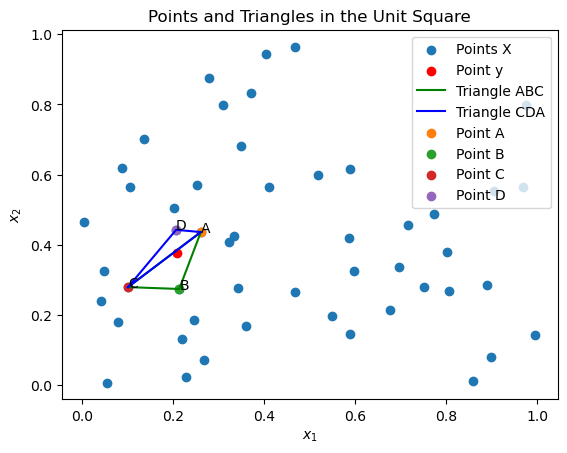

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the random number generator and the points X and y
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function to find the closest point satisfying the given conditions
def find_closest_point(X, y, condition):
    distances = np.sqrt((X[:, 0] - y[0])**2 + (X[:, 1] - y[1])**2)
    valid_points = [i for i, (x1, x2) in enumerate(X) if condition(x1, x2)]
    if not valid_points:
        return None
    closest_point_idx = min(valid_points, key=lambda i: distances[i])
    return X[closest_point_idx]

# Conditions for points A, B, C, and D
condition_A = lambda x1, x2: x1 > y[0] and x2 > y[1]
condition_B = lambda x1, x2: x1 > y[0] and x2 < y[1]
condition_C = lambda x1, x2: x1 < y[0] and x2 < y[1]
condition_D = lambda x1, x2: x1 < y[0] and x2 > y[1]

# Find points A, B, C, and D
A = find_closest_point(X, y, condition_A)
B = find_closest_point(X, y, condition_B)
C = find_closest_point(X, y, condition_C)
D = find_closest_point(X, y, condition_D)

# Plot the points and the triangles
plt.scatter(X[:, 0], X[:, 1], label='Points X')
plt.scatter([y[0]], [y[1]], color='red', label='Point y')
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'g-', label='Triangle ABC')
if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'b-', label='Triangle CDA')

# Annotate the points A, B, C, and D
for point, name in zip([A, B, C, D], ['A', 'B', 'C', 'D']):
    if point is not None:
        plt.scatter([point[0]], [point[1]], label=f'Point {name}')
        plt.annotate(name, (point[0], point[1]))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Points and Triangles in the Unit Square')
plt.show()


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [13]:
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for both triangles
r_ABC = barycentric_coordinates(y, A, B, C) if A is not None and B is not None and C is not None else (None, None, None)
r_CDA = barycentric_coordinates(y, C, D, A) if C is not None and D is not None and A is not None else (None, None, None)

# Check if y is inside triangle ABC
inside_ABC = all(0 <= r <= 1 for r in r_ABC) if None not in r_ABC else False

# Check if y is inside triangle CDA
inside_CDA = all(0 <= r <= 1 for r in r_CDA) if None not in r_CDA else False

# Print the results
print(f"Barycentric coordinates of y with respect to triangle ABC: {r_ABC}")
print(f"Barycentric coordinates of y with respect to triangle CDA: {r_CDA}")
print(f"Is y inside triangle ABC? {'Yes' if inside_ABC else 'No'}")
print(f"Is y inside triangle CDA? {'Yes' if inside_CDA else 'No'}")

# Determine which triangle y is inside
if inside_ABC:
    print("y is inside triangle ABC.")
elif inside_CDA:
    print("y is inside triangle CDA.")
else:
    print("y is not inside either triangle ABC or CDA.")

Barycentric coordinates of y with respect to triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Barycentric coordinates of y with respect to triangle CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Is y inside triangle ABC? Yes
Is y inside triangle CDA? No
y is inside triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the random number generator and the points X and y
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function to find the closest point satisfying the given conditions
def find_closest_point(X, y, condition):
    distances = np.sqrt((X[:, 0] - y[0])**2 + (X[:, 1] - y[1])**2)
    valid_points = [i for i, (x1, x2) in enumerate(X) if condition(x1, x2)]
    if not valid_points:
        return None
    closest_point_idx = min(valid_points, key=lambda i: distances[i])
    return X[closest_point_idx]

# Conditions for points A, B, C, and D
condition_A = lambda x1, x2: x1 > y[0] and x2 > y[1]
condition_B = lambda x1, x2: x1 > y[0] and x2 < y[1]
condition_C = lambda x1, x2: x1 < y[0] and x2 < y[1]
condition_D = lambda x1, x2: x1 < y[0] and x2 > y[1]

# Find points A, B, C, and D
A = find_closest_point(X, y, condition_A)
B = find_closest_point(X, y, condition_B)
C = find_closest_point(X, y, condition_C)
D = find_closest_point(X, y, condition_D)

# Function to compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for both triangles
r_ABC = barycentric_coordinates(y, A, B, C) if A is not None and B is not None and C is not None else (None, None, None)
r_CDA = barycentric_coordinates(y, C, D, A) if C is not None and D is not None and A is not None else (None, None, None)

# Check if y is inside triangle ABC
inside_ABC = all(0 <= r <= 1 for r in r_ABC) if None not in r_ABC else False

# Check if y is inside triangle CDA
inside_CDA = all(0 <= r <= 1 for r in r_CDA) if None not in r_CDA else False

# Define the function f(x1, x2)
def f(x1, x2):
    return np.sin(np.pi * x1) * np.cos(np.pi * x2)

# Compute the function values at points A, B, C, and D
f_A = f(*A) if A is not None else None
f_B = f(*B) if B is not None else None
f_C = f(*C) if C is not None else None
f_D = f(*D) if D is not None else None

# Compute the approximation of f(y)
f_y_approx = None
if inside_ABC:
    f_y_approx = r_ABC[0] * f_A + r_ABC[1] * f_B + r_ABC[2] * f_C
elif inside_CDA:
    f_y_approx = r_CDA[0] * f_C + r_CDA[1] * f_D + r_CDA[2] * f_A

# Compute the true value of f(y)
f_y_true = f(*y)

# Print the results
f_y_approx, f_y_true, abs(f_y_approx - f_y_true) if f_y_approx is not None else 'NaN'

(0.17910925123811003, 0.2287396268951984, 0.04963037565708836)

In [15]:
# Define the function f(x1, x2)
def f(x1, x2):
    return np.sin(np.pi * x1) * np.cos(np.pi * x2)

# Compute the function values at points A, B, C, and D
f_A = f(*A) if A is not None else None
f_B = f(*B) if B is not None else None
f_C = f(*C) if C is not None else None
f_D = f(*D) if D is not None else None

# Compute the approximation of f(y)
f_y_approx = None
if inside_ABC:
    f_y_approx = r_ABC[0] * f_A + r_ABC[1] * f_B + r_ABC[2] * f_C
elif inside_CDA:
    f_y_approx = r_CDA[0] * f_C + r_CDA[1] * f_D + r_CDA[2] * f_A

# Compute the true value of f(y)
f_y_true = f(*y)

# Print the results
f_y_approx, f_y_true, abs(f_y_approx - f_y_true) if f_y_approx is not None else 'NaN'

(0.17910925123811003, 0.2287396268951984, 0.04963037565708836)

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here